In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle Code"></form>''')

# Stratification: MESA vs PPM

In [2]:
%pylab nbagg
import utils
import astronomy as ast
from ppm import *
import mesa as ms
import numpy as np
import matplotlib.pyplot as plt

/usr/local/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Populating the interactive namespace from numpy and matplotlib


In [3]:
mesa_logs_path = '/rpod2/PPM/Stellar_models/AGBTP_M2.0Z1.e-5/M2.00Z1.e-5/LOGS/'
mesa_model_num = 24150
mesa_prof = ms.mesa_profile(mesa_logs_path, mesa_model_num)
# convert the mesa variables to cgs units
mesa_r = ast.rsun_cm*mesa_prof.get('radius')
mesa_p = 10**mesa_prof.get('logP')
mesa_rho = 10**mesa_prof.get('logRho')
mesa_mu = mesa_prof.get('mu')
mesa_T = 10**mesa_prof.get('logT')

# get the PPM models in cgs units
F4_prof = yprofile('/rpod2/PPM/YProfiles/AGBTP_M2.0Z1.e-5/F4/')
F4_r = 1e8*F4_prof.get('Y', fname = 0, resolution = 'l')
F4_p = 1e19*F4_prof.get('P', fname = 0, resolution = 'l')
F4_rho = 1e3*F4_prof.get('Rho', fname = 0, resolution = 'l')
F4_FV = F4_prof.get('FV H+He', fname = 0, resolution = 'l')
F4_airmu = 1.39165
F4_cldmu = 0.725
F4_mu = F4_airmu*(1. - F4_FV) + F4_cldmu*F4_FV
F4_T = 1e9*F4_prof.get('T9', fname = 0, resolution = 'l', \
                       airmu=F4_airmu, cldmu=F4_cldmu)

# cut out the physical domain
F4_r_bot = 8e8
F4_r_top = 33e8
F4_idx_bot = np.argmin(np.abs(F4_r - F4_r_bot))
F4_idx_top = np.argmin(np.abs(F4_r - F4_r_top))
F4_r = F4_r[F4_idx_top:F4_idx_bot]
F4_p = F4_p[F4_idx_top:F4_idx_bot]
F4_rho = F4_rho[F4_idx_top:F4_idx_bot]
F4_mu = F4_mu[F4_idx_top:F4_idx_bot]
F4_T = F4_T[F4_idx_top:F4_idx_bot]

G2_prof = yprofile('/rpod2/PPM/YProfiles/sakurai/G2/')
G2_r = 1e8*G2_prof.get('Y', fname = 0, resolution = 'l')
G2_p = 1e19*G2_prof.get('P', fname = 0, resolution = 'l')
G2_rho = 1e3*G2_prof.get('Rho', fname = 0, resolution = 'l')
G2_FV = G2_prof.get('FV H+He', fname = 0, resolution = 'l')
G2_airmu = 1.53796859981
G2_cldmu = 0.634920634921
G2_mu = G2_airmu*(1. - G2_FV) + F4_cldmu*G2_FV
G2_T = 1e9*G2_prof.get('T9', fname = 0, resolution = 'l', \
                       airmu=G2_airmu, cldmu=G2_cldmu)

# cut out the physical domain
G2_r_bot = 7e8
G2_r_top = 22e8
G2_idx_bot = np.argmin(np.abs(G2_r - G2_r_bot))
G2_idx_top = np.argmin(np.abs(G2_r - G2_r_top))
G2_r = G2_r[G2_idx_top:G2_idx_bot]
G2_p = G2_p[G2_idx_top:G2_idx_bot]
G2_rho = G2_rho[G2_idx_top:G2_idx_bot]
G2_mu = G2_mu[G2_idx_top:G2_idx_bot]
G2_T = G2_T[G2_idx_top:G2_idx_bot]

cb = utils.colourblind

983 in profiles.index file ...
Found and load nearest profile for cycle 24150
reading /rpod2/PPM/Stellar_models/AGBTP_M2.0Z1.e-5/M2.00Z1.e-5/LOGS//log787.data ...
 reading ...100% 

Reading attributes from file  YProfile-01-1959.bobaaa
Analyzing headers ...
There are 1960 YProfile files in the /rpod2/PPM/YProfiles/AGBTP_M2.0Z1.e-5/F4/ directory.
Ndump values range from 0 to 1959
Time values range from 86.5493 to 162264.0
Reading attributes from file  YProfile-01-1800.bobaaa
Analyzing headers ...
There are 1801 YProfile files in the /rpod2/PPM/YProfiles/sakurai/G2/ directory.
Ndump values range from 0 to 1800
Time values range from 0.0 to 86340.0


<IPython.core.display.Javascript object>


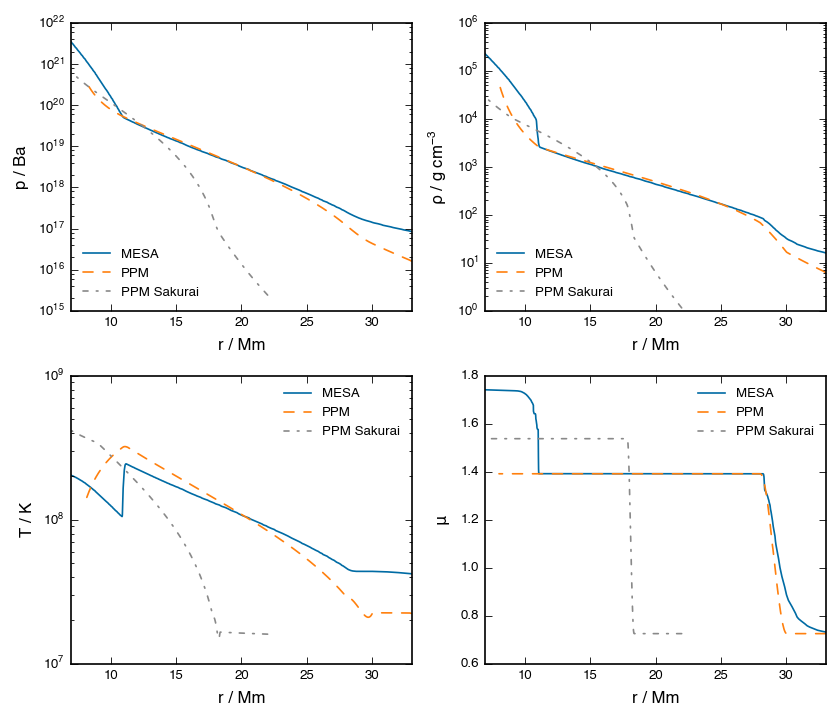

In [4]:
ifig = 1; plt.close(ifig); fig = plt.figure(ifig, figsize=(7., 6.), dpi=120)

xlim = (G2_r_bot/1e8, F4_r_top/1e8)

ax1 = fig.add_subplot(221)
ax1.semilogy(mesa_r/1e8, mesa_p, ls = '-', color = cb(5), label = "MESA")
ax1.semilogy(F4_r/1e8, F4_p, ls = '--', color = cb(1), label = "PPM")
ax1.semilogy(G2_r/1e8, G2_p, ls = '-.', color = cb(9), label = "PPM Sakurai")
ax1.set_xlim(xlim)
ax1.set_ylim((1e15, 1e22))
ax1.set_xlabel('r / Mm')
ax1.set_ylabel('p / Ba')
ax1.legend(loc = 0)

ax2 = fig.add_subplot(222)
ax2.semilogy(mesa_r/1e8, mesa_rho, ls = '-', color = cb(5), label = "MESA")
ax2.semilogy(F4_r/1e8, F4_rho, ls = '--', color = cb(1), label = "PPM")
ax2.semilogy(G2_r/1e8, G2_rho, ls = '-.', color = cb(9), label = "PPM Sakurai")
ax2.set_xlim(xlim)
ax2.set_ylim((1e0, 1e6))
ax2.set_xlabel('r / Mm')
ax2.set_ylabel(r'$\rho$ / g cm$^{-3}$')
ax2.legend(loc = 0)

ax3 = fig.add_subplot(223)
ax3.semilogy(mesa_r/1e8, mesa_T, ls = '-', color = cb(5), label = "MESA")
ax3.semilogy(F4_r/1e8, F4_T, ls = '--', color = cb(1), label = "PPM")
ax3.semilogy(G2_r/1e8, G2_T, ls = '-.', color = cb(9), label = "PPM Sakurai")
ax3.set_xlim(xlim)
ax3.set_ylim((1e7, 1e9))
ax3.set_xlabel('r / Mm')
ax3.set_ylabel('T / K')
ax3.legend(loc = 0)

ax4 = fig.add_subplot(224)
ax4.plot(mesa_r/1e8, mesa_mu, ls = '-', color = cb(5), label = "MESA")
ax4.plot(F4_r/1e8, F4_mu, ls = '--', color = cb(1), label = "PPM")
ax4.plot(G2_r/1e8, G2_mu, ls = '-.', color = cb(9), label = "PPM Sakurai")
ax4.set_xlim(xlim)
ax4.set_ylim((0.6, 1.8))
ax4.set_xlabel('r / Mm')
ax4.set_ylabel(r'$\mu$')
ax4.legend(loc = 0)

fig.tight_layout()
fig.savefig('stratification_MESA_vs_PPM.pdf', dpi=300)